In [2]:
# import pandas as pd

# municipios = pd.read_excel('resources/elecciones.xlsx', index_col=False)

In [3]:
# # Arreglor el Nombre de las columnas de la tabla para poder acceder a ellas usando el "."
# municipios.columns = [i.strip().replace(' ','_') for i in municipios.columns]

# fix_col_names = list(map(lambda nombre: nombre.replace(' ','_'), col_names))
# municipios.columns = fix_col_names

# # Arreglar el los espacios adicionales en los valores string de la tabla (columnas 0, 2 y 4)
# municipios.Nombre_de_Comunidad = municipios.Nombre_de_Comunidad.apply(lambda i: i.strip())
# municipios.Nombre_de_Provincia = municipios.Nombre_de_Provincia.apply(lambda i: i.strip())
# municipios.Nombre_de_Municipio = municipios.Nombre_de_Municipio.apply(lambda i: i.strip())

# # La columna Codigo_de_Provincia debe ser string, no se deberia poder operaciones matematicas sobre ella
# municipios.Código_de_Provincia = [str(i) for i in municipios.Código_de_Provincia]

## Carga de la nueva tabla de elecciones - Solo Madrid
 

In [4]:
import pandas as pd
import os
import re

path = "resources/Tablas_elecciones_barrio/"
files = ""
tables = []
print(len(tables))
    

0


In [73]:
tables = []
# Cargar los nombre de todos los archivos almacenados dentro de la carpeta "resources/Tablas_elecciones_barrio/"
for r, d, f in os.walk(path):
    files = f

# lectura y limpieza de las 21 tablas. Resultado: una lista de 21 tablas
contador = 0
for file in files:
    tmp_table = pd.read_excel(path + '{0}'.format(file), 
                              sep=";", encoding="ISO-8859-1")
    tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
    tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
    tmp_table.drop([0,1], inplace=True)
# #     print(tmp_table.Total_votos_a_candidaturas)
    for i in range(0, len(tmp_table.Barrio)):
        tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", str.strip(tmp_table.iloc[i,0].upper()))
        
    tables.append(tmp_table)


# # Se concatenan las 21 tablas en una sola
main_table_elecciones = pd.concat(tables, sort=True)
# Se unifica el index para toda la tabla
main_table_elecciones.reset_index(drop=True, inplace=True)    
main_table_elecciones[['Distrito', 'Barrio','P.S.O.E.']]


# Pendientes
#  OK 1 -La columna "Barrio" debe contener solo el nombre del barrio. Para el código se debe crear una nueva columna "Codigo"
# 2 -Crear una nueva columna en donde se puedan observar los porcentajes de abstención
#  OK 3- Poner el nombre del distrito (por ejemplo 'Centro') en una columna -"Distrito"- para todos los barrios que pertenecen a él


,Distrito,Barrio,P.S.O.E.
0,CENTRO,PALACIO,1.149
1,CENTRO,EMBAJADORES,2.073
2,CENTRO,CORTES,449.000
3,CENTRO,JUSTICIA,686.000
4,CENTRO,UNIVERSIDAD,1.428
5,CENTRO,SOL,284.000
6,ARGANZUELA,IMPERIAL,1.388
7,ARGANZUELA,ACACIAS,2.419
8,ARGANZUELA,CHOPERA,1.406
9,ARGANZUELA,LEGAZPI,1.053


# Carga de la tabla del Padron por parrios 
Actulizada el 1 de Noviembre de 2019

In [6]:
import pandas as pd


# Cargar la tabla del Padron por barrios
padron = pd.read_excel("resources/padron_barrios.xls")


In [7]:
# Limpieza y organización de la tabla
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                tmp.append(padron.iloc[i:j,].copy(deep=True))
                tmp[separador_tabla].drop([i,i+1], inplace=True) 
                tmp[separador_tabla]['Distrito'] = dis_bar[0]
                tmp[separador_tabla]['Barrio'] = dis_bar[1].strip()
                break
        separador_tabla += 1

main_table_padron = pd.concat(tmp)
main_table_padron.Barrio = [str.strip(i) for i in main_table_padron.Barrio]
main_table_padron.reset_index(drop=True, inplace=True)
main_table_padron.head(50)


    

,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
0,0 - 4,263.0,238.0,501.0,56.0,50.0,106.0,319.0,288.0,607.0,CENTRO,PALACIO
1,5 - 9,235.0,265.0,500.0,43.0,38.0,81.0,278.0,303.0,581.0,CENTRO,PALACIO
2,10 - 14,227.0,238.0,465.0,30.0,38.0,68.0,257.0,276.0,533.0,CENTRO,PALACIO
3,15 - 19,234.0,282.0,516.0,44.0,55.0,99.0,278.0,337.0,615.0,CENTRO,PALACIO
4,20 - 24,323.0,346.0,669.0,161.0,212.0,373.0,484.0,558.0,1042.0,CENTRO,PALACIO
5,25 - 29,627.0,567.0,1194.0,319.0,434.0,753.0,946.0,1001.0,1947.0,CENTRO,PALACIO
6,30 - 34,833.0,729.0,1562.0,309.0,357.0,666.0,1142.0,1086.0,2228.0,CENTRO,PALACIO
7,35 - 39,850.0,759.0,1609.0,327.0,298.0,625.0,1177.0,1057.0,2234.0,CENTRO,PALACIO
8,40 - 44,1002.0,826.0,1828.0,236.0,171.0,407.0,1238.0,997.0,2235.0,CENTRO,PALACIO
9,45 - 49,931.0,772.0,1703.0,198.0,116.0,314.0,1129.0,888.0,2017.0,CENTRO,PALACIO


In [8]:
# Homegenizar los nombres de los distritos

vector_distritos = list(pd.unique(main_table_elecciones.Distrito))
print(vector_distritos)
vector_districos_padron = list(pd.unique(main_table_padron.Distrito))
print(vector_districos_padron)
# main_table_elecciones[main_table_elecciones.Distrito == vector_distritos[2]]

# PENDIENTE REPARAR ESTO DE LOS NONOMBRE DE LAS COLUMNAS
main_table_elecciones[main_table_elecciones.Barrio == 'CASCO HISTORICO DE VALLECAS']
main_table_padron[main_table_padron.Distrito == 'VILLADEVALLECAS']


['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN', 'TETUAN', 'CHAMBERI', 'FUENCARRAL-ELPARDO', 'MONCLOA-ARAVACA', 'LATINA', 'CARABANCHEL', 'USERA', 'PUENTEDEVALLECAS', 'MORATALAZ', 'CIUDADLINEAL', 'HORTALEZA', 'VILLAVERDE', 'VILLADEVALLECAS', 'VICALVARO', 'SANBLAS-CANILLEJAS', 'BARAJAS']
['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN', 'TETUAN', 'CHAMBERI', 'FUENCARRAL-ELPARDO', 'MONCLOA-ARAVACA', 'LATINA', 'CARABANCHEL', 'USERA', 'PUENTEDEVALLECAS', 'MORATALAZ', 'CIUDADLINEAL', 'HORTALEZA', 'VILLAVERDE', 'VILLADEVALLECAS', 'VICALVARO', 'SANBLAS-CANILLEJAS', 'BARAJAS']


,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
2329,0 - 4,760.0,741.0,1501.0,226.0,215.0,441.0,986.0,956.0,1942.0,VILLADEVALLECAS,CASCOH.VALLECAS
2330,5 - 9,858.0,893.0,1751.0,210.0,205.0,415.0,1068.0,1098.0,2166.0,VILLADEVALLECAS,CASCOH.VALLECAS
2331,10 - 14,1036.0,954.0,1990.0,184.0,145.0,329.0,1220.0,1099.0,2319.0,VILLADEVALLECAS,CASCOH.VALLECAS
2332,15 - 19,1003.0,926.0,1929.0,185.0,166.0,351.0,1188.0,1092.0,2280.0,VILLADEVALLECAS,CASCOH.VALLECAS
2333,20 - 24,921.0,888.0,1809.0,245.0,289.0,534.0,1166.0,1177.0,2343.0,VILLADEVALLECAS,CASCOH.VALLECAS
2334,25 - 29,887.0,902.0,1789.0,356.0,398.0,754.0,1243.0,1300.0,2543.0,VILLADEVALLECAS,CASCOH.VALLECAS
2335,30 - 34,934.0,906.0,1840.0,424.0,531.0,955.0,1358.0,1437.0,2795.0,VILLADEVALLECAS,CASCOH.VALLECAS
2336,35 - 39,993.0,1055.0,2048.0,471.0,441.0,912.0,1464.0,1496.0,2960.0,VILLADEVALLECAS,CASCOH.VALLECAS
2337,40 - 44,1345.0,1408.0,2753.0,428.0,382.0,810.0,1773.0,1790.0,3563.0,VILLADEVALLECAS,CASCOH.VALLECAS
2338,45 - 49,1386.0,1422.0,2808.0,282.0,280.0,562.0,1668.0,1702.0,3370.0,VILLADEVALLECAS,CASCOH.VALLECAS


## En este punto, las tablas ya están listas para trabajar: main_table_padron, main_table_elecciones

### Espacio de Andres. 

In [66]:
# Arreglo formato columnas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

main_table_elecciones.head(10)

,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,PCAS-TC-PPCCAL-PACTO,PCTE,PH,PUM+J,Total_votos_a_candidaturas,ULEG,UPyD,VOX,Votos_blancos,Votos_nulos
0,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.000,5.0,5.998,...,3.0,1.0,0.0,7.0,12.369,1.0,8.0,724.000,50.0,47.0
1,10.829,EMBAJADORES,28.0,31.496,2.120,CENTRO,7.0,1.443,12.0,11.166,...,14.0,6.0,6.0,7.0,20.517,0.0,11.0,949.000,94.0,56.0
2,2.466,CORTES,6.0,7.755,779.000,CENTRO,2.0,188.000,1.0,2.410,...,1.0,3.0,2.0,2.0,5.246,0.0,3.0,300.000,27.0,16.0
3,4.225,JUSTICIA,9.0,12.838,1.518,CENTRO,6.0,183.000,4.0,3.502,...,0.0,0.0,1.0,6.0,8.554,0.0,13.0,594.000,37.0,22.0
4,7.683,UNIVERSIDAD,19.0,23.738,2.296,CENTRO,13.0,527.000,4.0,7.932,...,6.0,5.0,3.0,6.0,15.951,2.0,11.0,822.000,56.0,48.0
5,1.923,SOL,6.0,5.201,516.000,CENTRO,0.0,92.000,1.0,1.413,...,1.0,2.0,1.0,5.0,3.263,1.0,1.0,236.000,9.0,6.0
6,4.436,IMPERIAL,18.0,18.598,2.612,ARGANZUELA,5.0,368.000,4.0,5.309,...,9.0,3.0,4.0,10.0,14.050,0.0,13.0,1.005,62.0,50.0
7,6.995,ACACIAS,18.0,30.449,4.440,ARGANZUELA,5.0,667.000,5.0,9.079,...,10.0,3.0,5.0,13.0,23.291,0.0,19.0,1.407,95.0,68.0
8,4.729,CHOPERA,17.0,15.600,1.607,ARGANZUELA,8.0,394.000,3.0,4.303,...,10.0,2.0,3.0,8.0,10.769,0.0,10.0,623.000,51.0,51.0
9,3.252,LEGAZPI,12.0,14.431,2.699,ARGANZUELA,2.0,249.000,10.0,4.400,...,5.0,5.0,2.0,3.0,11.098,2.0,13.0,739.000,57.0,24.0


In [90]:
# intersección de tablas por la columna Distrito y Barrio
work_table = main_table_elecciones.merge(main_table_padron, on=["Distrito", "Barrio"])
# work_table.head(10)
work_table.columns

Index(['Abstención', 'Barrio', 'CNTG+', 'Censo_electoral', 'Cs', 'Distrito',
       'FE_de_las_JONS', 'IU-MpM', 'M.I.', 'MAS_MADRID', 'MCE', 'P-LIB',
       'P.C.P.E.', 'P.P.', 'P.S.O.E.', 'PACMA', 'PCAS-TC-PPCCAL-PACTO', 'PCTE',
       'PH', 'PUM+J', 'Total_votos_a_candidaturas', 'ULEG', 'UPyD', 'VOX',
       'Votos_blancos', 'Votos_nulos', 'Edad', 'Españoles_Hombres',
       'Españoles_Mujeres', 'Españoles_Total', 'Extranjeros_Hombres',
       'Extranjeros_Mujeres', 'Extranjeros_Total', 'Total_Hombres',
       'Total_Mujeres', 'Total'],
      dtype='object')

In [132]:
# Selecciono las personas de 20 a 34 años
rango_edades_jovenes = pd.unique(work_table.Edad)
rango_edades_jovenes = np.delete(rango_edades_jovenes, [0,1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
# rango_edades_jovenes = np.delete(rango_edades_jovenes, [0,1,2,3,4,5,6])

# # Seleccionamos las edades iguales o superiores a 35 años
# rango_edades_jovenes_no_jovenes = pd.unique(work_table.Edad)
# rango_edades_jovenes_no_jovenes = np.delete(rango_edades_jovenes_no_jovenes, [0,1,2,3,4,5,6])

def seleccionar_data_por_edad(edades):
    temp_one = work_table[work_table['Edad'].isin(edades)].copy(deep=True)
    temp = temp_one.groupby(['Distrito']).agg({'Total': 'sum'}).reset_index()
    return temp

def seleccionar_data_por_partido(partido):
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({partido: 'max'}).reset_index()
    temp = temp.groupby(['Distrito']).agg({partido: 'sum'}).reset_index()
    return temp

# Numero de personas por distrito entre los 20 y 34 años
numero_v_distrito_joven = seleccionar_data_por_edad(rango_edades_jovenes)

# Numero de votos para el PSOE pror distrito
votos_psoe_distrito = seleccionar_data_por_partido('P.S.O.E.') 


              Distrito    Total
3               CENTRO  36125.0
14           SALAMANCA  26967.0
15  SANBLAS-CANILLEJAS  25614.0
5             CHAMBERI  24642.0
2          CARABANCHEL  24260.0
0           ARGANZUELA  23228.0
7   FUENCARRAL-ELPARDO  22762.0
16              TETUAN  21739.0
9               LATINA  21720.0
6         CIUDADLINEAL  19329.0
8            HORTALEZA  18357.0
17               USERA  17487.0
4            CHAMARTIN  15735.0
12    PUENTEDEVALLECAS  15547.0
13              RETIRO  10419.0
11           MORATALAZ  10118.0
10     MONCLOA-ARAVACA   9799.0
18           VICALVARO   3418.0
19          VILLAVERDE   3049.0
1              BARAJAS    375.0
              Distrito  P.S.O.E.
15  SANBLAS-CANILLEJAS  1663.835
14           SALAMANCA  1578.225
3               CENTRO  1423.650
5             CHAMBERI  1418.488
11           MORATALAZ  1280.895
6         CIUDADLINEAL  1174.557
16              TETUAN   917.086
8            HORTALEZA   736.789
4            CHAMARTIN   718.15

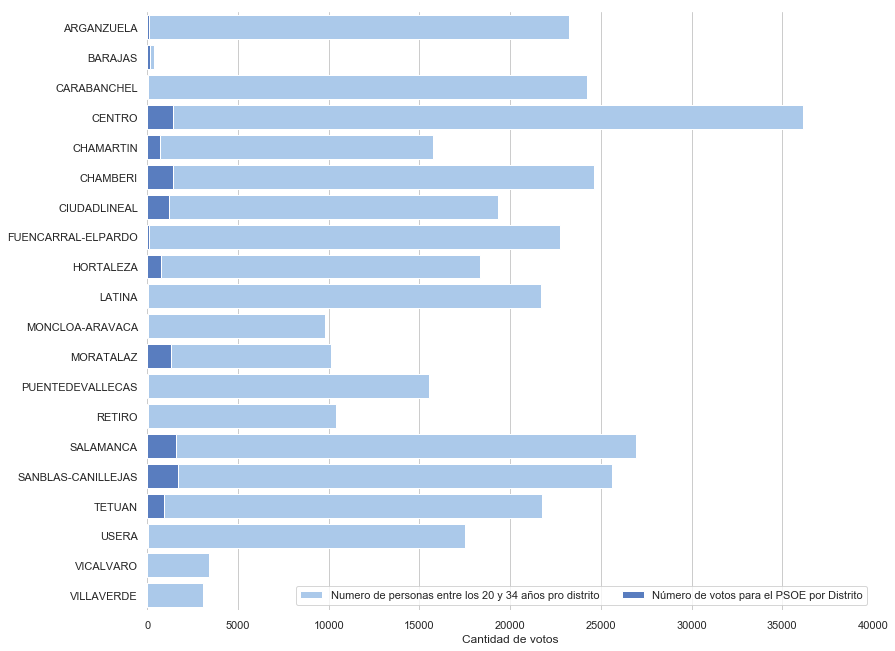

In [145]:
# # Se organiza de mayore a menor
# data_joven = numero_v_distrito_joven.sort_values('Total', ascending=False)
# data_psoe = votos_psoe_distrito.sort_values('P.S.O.E.', ascending=False)

print(data_joven)
print(data_psoe)
# Se plotea la gráfica para ver los votos del PSOE por Distrito
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total", data=numero_v_distrito_joven,
            label="Numero de personas entre los 20 y 34 años pro distrito", color="b")


sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='P.S.O.E.', data=votos_psoe_distrito,
            label="Número de votos para el PSOE por Distrito",  color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 40000), ylabel="",
       xlabel="Cantidad de votos")
sns.despine(left=True, bottom=True)



In [64]:
# pd.unique(work_table.Distrito) 
# work_table.groupby('Distrito').agg({'Extranjeros_Total': 'sum', 'Españoles_Total': 'sum'})
# work_table['%_mig_psoe'] = work_table.apply(lambda fila: print(fila))

# Porcentaje de extranjeros contra el total de votos a candidaturas
work_table['migrantes_Tvc'] = work_table.Extranjeros_Total *100 / work_table.Total_votos_a_candidaturas

# Porcentaje de extranjeros contra el total de de votos
work_table['migrantes_Ce'] = work_table.Extranjeros_Total *100 / work_table.Censo_electoral

work_table['migrantes_mujeres_totalvotos'] = work_table.Extranjeros_Mujeres * 100 / work_table.Censo_electoral

work_table['migrantes_hombres_totalvotos'] = work_table.Extranjeros_Hombres * 100 / work_table.Censo_electoral

x = work_table.groupby(['Distrito','Barrio']).agg({'Total': 'sum'}).reset_index()

# x = list(pd.unique(work_table.Barrio))

# # print(work_table.Extranjeros_Total[0])
# # print(work_table.Total_votos_a_candidaturas[0])
# work_table

# work_table['Extranjeros_Total'] = work_table['Extranjeros_Total'].astype(np.int64)